In [126]:
index=0
out=open("nvp_kep_fix.txt","w")

with open("nvp_kegg_egg_pog_anns.txt") as infile:
    for l in infile:
        if len(l.split("\t"))>25:
            vec=l.split("\t")
            vec1=vec[0:5]+vec[13:]
            out.write("\t".join(vec1))
        else:
            out.write(l)
out.close()


In [129]:
import pandas as pd
from pandas import DataFrame

df=pd.read_csv("nvp_kep_fix.txt", sep="\t", header=False)

In [134]:
infile=open("nvp_kep_fix.txt").readlines()

In [139]:
len(infile[265].split("\t"))

25

In [11]:
%reload_ext rpy2.ipython
%R library(dplyr); library(ggplot2); library(reshape); library(magrittr)

array(['magrittr', 'reshape', 'ggplot2', 'dplyr', 'tools', 'stats',
       'graphics', 'grDevices', 'utils', 'datasets', 'methods', 'base'], 
      dtype='|S9')

In [12]:
%%R 
a<-read.csv("./nvp_kep_fix.txt",na.strings="NA", sep="\t", header=FALSE)
str(a)%>%print
pogs<-a[,c(1:2,17:25)]

kegg<-a[,1:9]
eggnog<-a[,c(1:2,10:16)]


'data.frame':	22045 obs. of  25 variables:
 $ V1 : Factor w/ 284 levels "Vibriophage_1.003.O._10N.286.48.A2",..: 79 79 79 79 79 79 79 79 79 79 ...
 $ V2 : Factor w/ 22045 levels "NVP1003O_01",..: 5778 5779 5780 5781 5782 5783 5784 5785 5786 5787 ...
 $ V3 : Factor w/ 203 levels "aae:aq_220","aav:Aave_0557",..: NA NA NA NA NA NA NA NA NA NA ...
 $ V4 : num  NA NA NA NA NA NA NA NA NA NA ...
 $ V5 : num  NA NA NA NA NA NA NA NA NA NA ...
 $ V6 : Factor w/ 403 levels "0","0.00012",..: NA NA NA NA NA NA NA NA NA NA ...
 $ V7 : Factor w/ 9 levels "hypothetical protein",..: NA NA NA NA NA NA NA NA NA NA ...
 $ V8 : Factor w/ 91 levels "K00287","K00525",..: NA NA NA NA NA NA NA NA NA NA ...
 $ V9 : Factor w/ 138 levels "12","20S proteasome subunits A and B",..: NA NA NA NA NA NA NA NA NA NA ...
 $ V10: Factor w/ 897 levels "1000565.METUNv1_01697",..: NA NA 29 NA NA NA NA NA NA NA ...
 $ V11: num  NA NA 97.1 NA NA ...
 $ V12: num  NA NA 37.7 NA NA NA NA NA NA NA ...
 $ V13: num  NA NA 8e-115 N

In [13]:
%%R
head(na.omit(pogs))

                                    V1          V2
43 Vibriophage_1.094.O._10N.286.55.E12 NVP1094O_43
51 Vibriophage_1.094.O._10N.286.55.E12 NVP1094O_51
58 Vibriophage_1.094.O._10N.286.55.E12 NVP1094O_58
63 Vibriophage_1.094.O._10N.286.55.E12 NVP1094O_63
64 Vibriophage_1.094.O._10N.286.55.E12 NVP1094O_64
66 Vibriophage_1.094.O._10N.286.55.E12 NVP1094O_66
                                V17       V18  V19      V20     V21
43 gi|228861060|ref|YP_002854083.1|  94.61538 39.8  5.8e-21 POG0269
51     gi|68299737|ref|YP_249586.1|  98.03922 40.7  2.2e-27 POG0023
58     gi|46402144|ref|YP_006638.1|  94.68085 60.7  1.4e-24 POG1253
63 gi|281416462|ref|YP_003347382.1| 100.89485 50.1 1.1e-130 POG0053
64     gi|91214214|ref|NP_919001.2|  92.47312 44.2  6.8e-16 POG0327
66 gi|148912854|ref|YP_001293433.1|  88.60353 41.1 7.1e-109 POG1291
                      V22                           V23
43            ant protein  Caudovirales ; Tailed phages
51  lysozyme-like protein  Caudovirales ; Tailed phages

In [14]:
%%R
pogs1<-na.omit(pogs)
pogs1%>%group_by(V1, V24)%>%summarise(count=n())->phy
phy%>%group_by(V1)%>%summarise(count=n())%>%filter(count==1)->singles
definitive<-phy[which(phy$V1 %in% singles$V1),]
print(definitive[,2])

Source: local data frame [32 x 1]

                                                                     V24
                                                                  (fctr)
1                             Myoviridae ; phages with contractile tails
2                                                             Tectivirus
3   Siphoviridae ; Styloviridae ; phages with long non-contractile tails
4   Siphoviridae ; Styloviridae ; phages with long non-contractile tails
5                             Myoviridae ; phages with contractile tails
6                             Myoviridae ; phages with contractile tails
7                                                             Tectivirus
8                                                             Tectivirus
9                                                             Tectivirus
10                            Myoviridae ; phages with contractile tails
..                                                                   ...


* 32 phages with hits to only one virus phylogenetic group
* next, look at phylogeny if polymerase hit is considered...

In [15]:
%%R

pogs1[grep("polymerase", pogs1$V22),]%>%nrow%>%print
pogs1[grep("polymerase", pogs1$V22),]%>%merge(aggregate(V20~V1, data=.,min),.,all.x=T)%>%nrow%>%print

[1] 85
[1] 62


In [16]:
%%R
pogs1[grep("capsid",pogs1$V22),]%>%nrow%>%print
pogs1[grep("capsid",pogs1$V22),]%>%merge(aggregate(V20~V1, data=.,min),.,all.x=T)%>%nrow%>%print

[1] 129
[1] 91


In [17]:
%%R
pogs1[grep("capsid|polymerase",pogs1$V22),]%>%nrow%>%print
pogs1[grep("capsid|polymerase",pogs1$V22),]%>%merge(aggregate(V20~V1, data=.,min),.,all.x=T)%>%nrow%>%print

[1] 214
[1] 144


* 62 phages within the dataset have strong hits to phage polymerases that could be used for phylogeny assignments
* 91 phages with hits to polymerases

In [18]:
%%R 
#function to pull out best hit via e-value if an equal number of genes match different phage-types
#otherwise select the phage type that the majority of proteins match

pogs1$V1%>%unique->phages

tax_assignment<-vector()

get_taxa=function(subset, category){
    
    subset%>%group_by(V24)%>%summarise(count=n())->tax_counts
    
    max_hit=max(tax_counts$count)

    if (nrow(tax_counts[which(tax_counts$count==max_hit),])>1){
        taxa<-as.character(subset[which.min(subset$V20),10])
        
        }
    else {
        taxa<-as.character(tax_counts$V24[which(tax_counts$count==max_hit)])
    }
    return(taxa)
}



In [19]:
%%R -h 600
for (p in phages){
    subset<-pogs1%>%filter(V1==p)
    taxa=get_taxa(subset)
    if (taxa=="none found" & nrow(subset)>2){
        new_set<-tax_counts[which(tax_counts$count!=max_hit),]
        taxa<-get_taxa(new_set)
    }
    tax_assignment<-c(tax_assignment, taxa)
    }

phage_tax_asn<-cbind.data.frame(phages, tax_assignment)
colnames(phage_tax_asn)[1]<-"V1"
ggplot(phage_tax_asn, aes(tax_assignment))+geom_bar()+theme_bw()+theme(axis.text.x = element_text(angle = 90, hjust = 1))


Error: object 'tax_counts' not found


### some tests for best approach to assigning phylogeny below:

In [10]:
%%R
phage_tax_asn%>%group_by(tax_assignment)%>%summarise(count=n())


Error in eval(expr, envir, enclos) : object 'phage_tax_asn' not found


//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in eval(expr, envir, enclos) : object 'phage_tax_asn' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [377]:
%%R
min_e<-by(data=pogs1, INDICES=list(pogs1$V1), function(x) x[which.min(x$V20),])%>%do.call(rbind, .)
phymax<-by(data=phy, INDICES=list(phy$V1), function(x) x[which.max(x$count),])%>%do.call(rbind, .)
conserved_tax<-pogs1[grep("capsid|polymerase",pogs1$V22),]%>%merge(aggregate(V20~V1, data=.,min),.,all.x=T)

In [379]:
%%R
merge(conserved_tax, phymax, by="V1")->comp
merge(comp, min_e, by="V1")->comp
merge(comp, phage_tax_asn, by="V1")->comp
comp[which(comp$V24.x!=comp$V24.y),c(1,2,13,10,12,22,ncol(comp))]%>%print

                                     V1    V20.x count
2    Vibriophage_1.008.O._10N.286.54.E5  8.5e-95     1
3   Vibriophage_1.011.O._10N.286.49.B11  1.5e-94     1
5   Vibriophage_1.017.O._10N.286.55.C11 7.1e-109     4
14   Vibriophage_1.040.O._10N.286.45.B9  8.5e-95     1
17   Vibriophage_1.047.O._10N.286.55.F2  1.3e-62     3
21   Vibriophage_1.062.O._10N.286.55.C3  8.5e-95     1
23  Vibriophage_1.069.O._10N.286.49.F11  8.5e-95     1
26  Vibriophage_1.075.O._10N.286.55.B10 7.1e-109     4
32  Vibriophage_1.093.O._10N.286.55.E10 7.1e-109     4
33  Vibriophage_1.094.O._10N.286.55.E12 7.1e-109     4
48   Vibriophage_1.125.O._10N.286.49.F5  8.5e-95     1
52   Vibriophage_1.133.O._10N.222.51.E4 9.4e-113     4
119  Vibriophage_1.249.A._10N.261.55.B9  1.0e-92     1
120  Vibriophage_1.249.B._10N.261.55.B9  1.0e-92     1
125  Vibriophage_1.262.O._10N.286.51.A9 5.3e-184     5
133  Vibriophage_1.284.A._10N.286.55.A5  1.7e-65     3
140  Vibriophage_2.092.O._10N.286.52.B7  8.5e-95     1
          

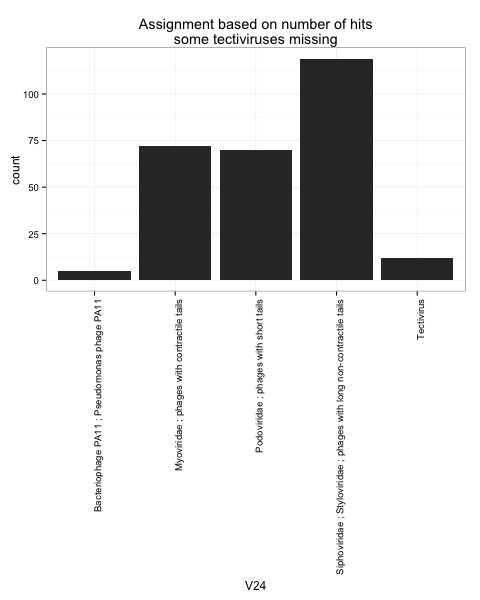

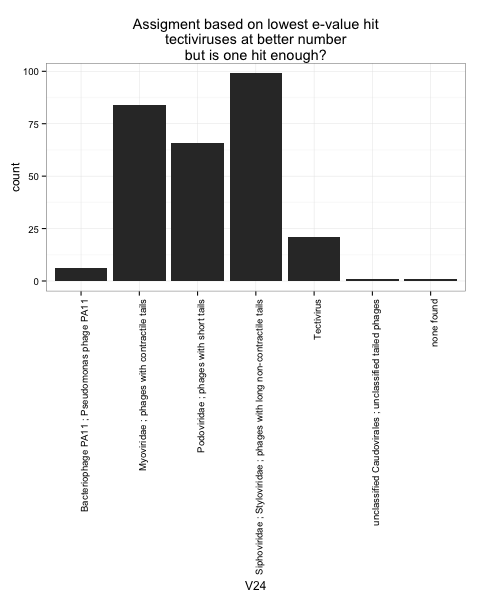

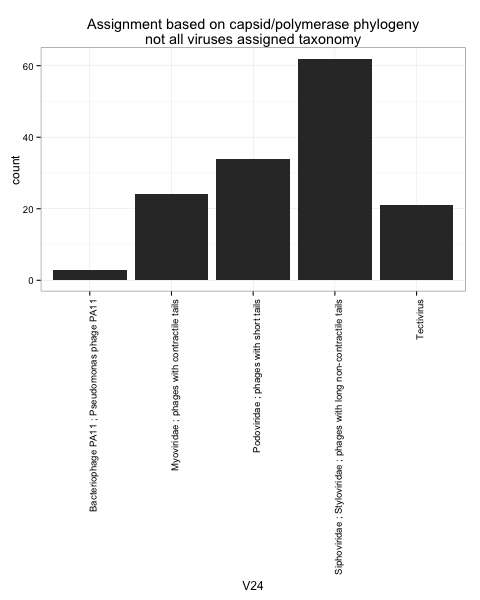

In [374]:
%%R -h 600
ggplot(phymax, aes(V24))+geom_bar()+theme_bw()+theme(axis.text.x = element_text(angle = 90, hjust = 1))->plota
ggplot(min_e, aes(V24))+geom_bar()+theme_bw()+theme(axis.text.x = element_text(angle = 90, hjust = 1))->plotb
ggplot(conserved_tax, aes(V24))+geom_bar()+theme_bw()+theme(axis.text.x = element_text(angle = 90, hjust = 1))->plotc
plot(plota+labs(title="Assignment based on number of hits\nsome tectiviruses missing"))
plot(plotb+labs(title="Assigment based on lowest e-value hit\ntectiviruses at better number\nbut is one hit enough?"))
plot(plotc+labs(title="Assignment based on capsid/polymerase phylogeny\nnot all viruses assigned taxonomy"))

In [413]:
%%R
head(pogs1)

                                    V1          V2
43 Vibriophage_1.094.O._10N.286.55.E12 NVP1094O_43
51 Vibriophage_1.094.O._10N.286.55.E12 NVP1094O_51
58 Vibriophage_1.094.O._10N.286.55.E12 NVP1094O_58
63 Vibriophage_1.094.O._10N.286.55.E12 NVP1094O_63
64 Vibriophage_1.094.O._10N.286.55.E12 NVP1094O_64
66 Vibriophage_1.094.O._10N.286.55.E12 NVP1094O_66
                                V17       V18  V19      V20     V21
43 gi|228861060|ref|YP_002854083.1|  94.61538 39.8  5.8e-21 POG0269
51     gi|68299737|ref|YP_249586.1|  98.03922 40.7  2.2e-27 POG0023
58     gi|46402144|ref|YP_006638.1|  94.68085 60.7  1.4e-24 POG1253
63 gi|281416462|ref|YP_003347382.1| 100.89485 50.1 1.1e-130 POG0053
64     gi|91214214|ref|NP_919001.2|  92.47312 44.2  6.8e-16 POG0327
66 gi|148912854|ref|YP_001293433.1|  88.60353 41.1 7.1e-109 POG1291
                      V22                           V23
43            ant protein  Caudovirales ; Tailed phages
51  lysozyme-like protein  Caudovirales ; Tailed phages

## Better function for pulling out several different taxonomies

In [20]:
%%R
##gets phage "genus" and "species"
pogs1$V1%>%unique->phages

tax_assignment<-vector()

get_taxa=function(subset, category){
    
    subset%>%group_by(V24)%>%summarise(count=n())->tax_counts
    
    max_hit=max(tax_counts$count)

    if (nrow(tax_counts[which(tax_counts$count==max_hit),])>1){
        taxa<-as.character(subset[which.min(subset$V20),10])
        taxa1<-as.character(subset[which.min(subset$V20),11])
        taxa2<-as.character(subset[which.min(subset$V20),9])
        
        }
    else {
        taxa<-as.character(tax_counts$V24[which(tax_counts$count==max_hit)])
        subset2<-subset[which(subset$V24==taxa),]
        taxa1<-as.character(subset2[which.min(subset2$V20),11])
        taxa2<-as.character(subset2[which.min(subset2$V20),9])
    }
    return(c(taxa, taxa1, taxa2))
}



In [21]:
%%R -h 600
mylist=list()


for (i in seq(1, length(phages))){
    p=phages[i]
    subset<-pogs1%>%filter(V1==p)
    taxa=get_taxa(subset)
    if (taxa=="none found" & nrow(subset)>2){
        subset%>%filter(V24!="none found")->new_set
        taxa<-get_taxa(new_set)

    }
    
    withphage<-c(as.character(p), taxa)
    mylist[[i]]<-as.vector(withphage)
    }

phage_tax_asn<-do.call(rbind,mylist)%>%data.frame
print(phage_tax_asn[which(phage_tax_asn$X2=="NULL"),])
#colnames(phage_tax_asn)[1]<-"V1"
#ggplot(phage_tax_asn, aes(tax_assignment))+geom_bar()+theme_bw()+theme(axis.text.x = element_text(angle = 90, hjust = 1))

[1] X1 X2 X3 X4
<0 rows> (or 0-length row.names)


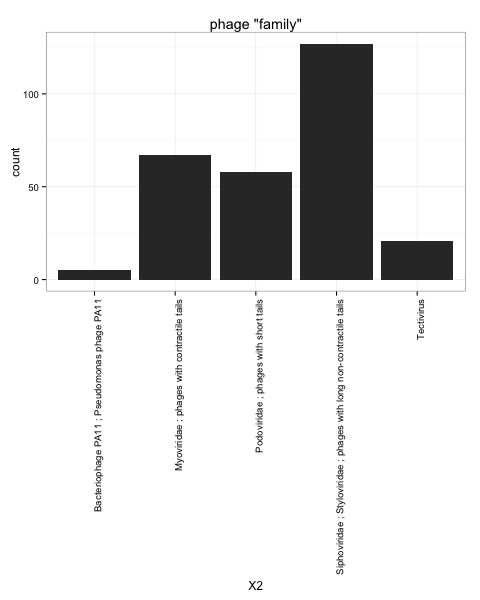

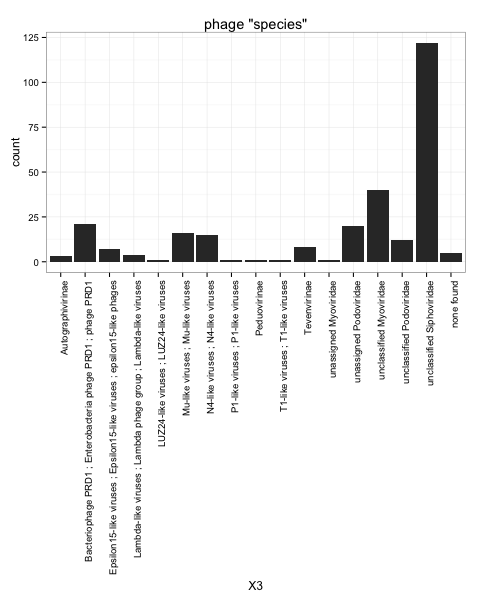

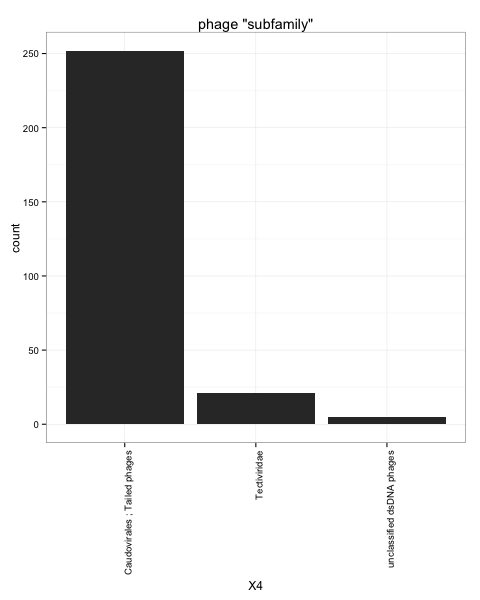

In [23]:
%%R -h 600
a<-ggplot(phage_tax_asn, aes(X2))+geom_bar()+theme_bw()+theme(axis.text.x = element_text(angle = 90, hjust = 1))
b<-ggplot(phage_tax_asn, aes(X3))+geom_bar()+theme_bw()+theme(axis.text.x = element_text(angle = 90, hjust = 1))
c<-ggplot(phage_tax_asn, aes(X4))+geom_bar()+theme_bw()+theme(axis.text.x = element_text(angle = 90, hjust = 1))
plot(a+labs(title='phage "family"'))
plot(b+labs(title='phage "species"'))
plot(c+labs(title='phage "subfamily"'))

In [496]:
%%R
write.table(phage_tax_asn, file="nvp_pog_phylogeny_assignments.txt", sep="\t",quote=FALSE, row.names=FALSE)